# Проект: Сегментация клиентской базы телекоммуникационной компании

Ясаков Олег

2023 г.

**Аналитическая цель проекта** — провести анализ данных с целью выделения наиболее значимых сегментов и признаков, влияющих на доход.

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import *

In [ ]:
df = pd.read_csv('/content/dataset_telecom.csv')

In [ ]:
df.head(3)

Возраст  Среднемесячный расход  Средняя продолжительность разговоров  \
0       24                    NaN                                   2.4   
1       51                 287.51                                   1.7   
2       41                 113.70                                   2.1   

   Звонков днем за месяц  Звонков вечером за месяц Звонков ночью за месяц  \
0                   12.0                      65.0                      5   
1                  111.0                     109.0                      1   
2                   41.0                      27.0                      0   

  Звонки в другие города  Звонки в другие страны  \
0                      0                       0   
1                     44                       0   
2                      0                       0   

  Доля звонков на стационарные телефоны Количество SMS за месяц  \
0                                     5                      56   
1                                     6                       1   
2                                     1                      36   

  Дата подключения тарифа  
0     2018-06-17 12:14:35  
1     2021-10-21 15:39:54  
2     2015-03-26 11:26:15

Поиск дублирующихся строк

In [ ]:
df[df.duplicated()]
# не найдено

Empty DataFrame
Columns: [age, month_consump, duration_call, month_daytime_calls, month_evening_calls, month_night_calls, intercity_calls, prop_ladline, month_sms, timestamp_connection, category, date_connect, year_connect, month_connect]
Index: []

Удаление пропусков (не боле 23% данных)

In [ ]:
df.dropna (inplace = True)

Переименование заголовков полей

In [ ]:
df.rename(columns = {'Возраст': 'age', 'Среднемесячный расход': 'month_consump',
'Средняя продолжительность разговоров': 'duration_call', 'Звонков днем за месяц': 'month_daytime_calls',
'Звонков вечером за месяц': 'month_evening_calls', 'Звонков ночью за месяц': 'month_night_calls',
'Звонки в другие города': 'intercity_calls', 'Звонки в другие страны': 'international_calls',
'Доля звонков на стационарные телефоны': 'prop_ladline', 'Количество SMS за месяц': 'month_sms',
'Дата подключения тарифа': 'timestamp_connection'}, inplace = True)

Проверка несоответствующих желаемому типу значений

In [ ]:
for m in df[['month_night_calls','intercity_calls','prop_ladline','month_sms']]:
  for n in df[m]:
    if not n.isdigit():
      print(m,':',n)

month_night_calls : '7'
intercity_calls : '29'
intercity_calls : '0'
prop_ladline : '2'
month_sms : '12'


Замена значений

In [ ]:
df.month_sms[df['month_sms']=="'12'"]='12'
df.month_night_calls[df['month_night_calls']=="'7'"]='7'
df.intercity_calls[df['intercity_calls']=="'29'"]='29'
df.intercity_calls[df['intercity_calls']=="'0'"]='0'
df.prop_ladline[df['prop_ladline']=="'2'"]='2'

Приведение к типам

In [ ]:
df = df.astype({'month_sms': 'int64','month_night_calls': 'int64','intercity_calls': 'int64','prop_ladline': 'int64'})
df["timestamp_connection"] = pd.to_datetime(df['timestamp_connection'])

Создание новых полей (дата, категориальный признак по взрасту)

In [ ]:
def if_age(row):
 if row['age'] >= 19 and row['age']<=24:
  val = 'студент'
 elif row['age'] >= 25 and row['age']<=33:
  val = 'молодой'
 elif row['age'] >= 34 and row['age']<=56:
  val = 'опытный'
 elif row['age'] >= 57 and row['age']<=70:
  val = 'знаток'
 return val

In [ ]:
df['category']=df.apply (if_age, axis=1)
df["date_connect"] = df["timestamp_connection"].dt.date
df["date_connect"] = pd.to_datetime(df['date_connect'])
df["year_connect"] = df["timestamp_connection"].dt.year
df["month_connect"] = df["timestamp_connection"].dt.month

Поиск аномалий

In [ ]:
df.describe(percentiles = [.05, .25, .50, .75, .95])

age  month_consump  duration_call  month_daytime_calls  \
count  4430.00000    4430.000000    4430.000000          4430.000000   
mean     41.88307     506.384546       4.226309            63.907223   
std      13.07620     648.257234       3.008247            63.004533   
min      19.00000       3.180000       0.100000             1.000000   
5%       20.00000      16.800000       1.100000             5.000000   
25%      31.00000     152.880000       2.000000            37.000000   
50%      43.00000     315.155000       3.300000            53.000000   
75%      52.00000     599.960000       5.900000            68.000000   
95%      63.00000    1620.494000       9.700000           133.550000   
max      70.00000    5142.760000      20.000000           500.000000   

       month_evening_calls  month_night_calls  intercity_calls  \
count          4430.000000        4430.000000      4430.000000   
mean             70.293905           6.261400         8.682167   
std              41.222571          14.674194        13.499074   
min               1.000000           0.000000         0.000000   
5%                4.000000           0.000000         0.000000   
25%              41.250000           0.000000         0.000000   
50%              71.000000           1.000000         2.000000   
75%              98.000000           5.000000        12.000000   
95%             142.000000          35.000000        39.000000   
max             160.000000         110.000000        88.000000   

       international_calls  prop_ladline    month_sms  year_connect  \
count          4430.000000   4430.000000  4430.000000   4430.000000   
mean              0.395485     10.330474    21.160497   2018.018962   
std               1.177910      9.246434    27.764674      1.980625   
min               0.000000      0.000000     0.000000   2015.000000   
5%                0.000000      0.000000     0.000000   2015.000000   
25%               0.000000      3.000000     3.000000   2016.000000   
50%               0.000000      8.000000     6.000000   2018.000000   
75%               0.000000     16.000000    32.000000   2020.000000   
95%               2.000000     27.000000    78.000000   2021.000000   
max              12.000000     60.000000   179.000000   2021.000000   

       month_connect  
count    4430.000000  
mean        6.503612  
std         3.399010  
min         1.000000  
5%          1.000000  
25%         4.000000  
50%         6.000000  
75%         9.000000  
95%        12.000000  
max        12.000000

На основе описаний можно сделать вывод, о том, что пользователи из данной выборки крайне редко пользуются звонками в другие страны. В рамках данного исследования опустим данное поле.

In [ ]:
df.drop(columns=('international_calls'),inplace = True);

In [ ]:
dist_list = ['month_consump', 'duration_call', 'month_daytime_calls', 'month_evening_calls','month_night_calls',
'intercity_calls', 'prop_ladline', 'month_sms']
rus_dist_dict = ['Среднемесячный расход', 'Средняя продолжительность разговоров',
'Звонков днем за месяц', 'Звонков вечером за месяц', 'Звонков ночью за месяц',
'Звонки в другие города', 'Доля звонков на стационарные телефоны', 'Количество SMS за месяц']

<ipython-input-31-156b3150156f>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8, 2, 2*index + 1)
<ipython-input-31-156b3150156f>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[col])
<ipython-input-31-156b3150156f>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your c

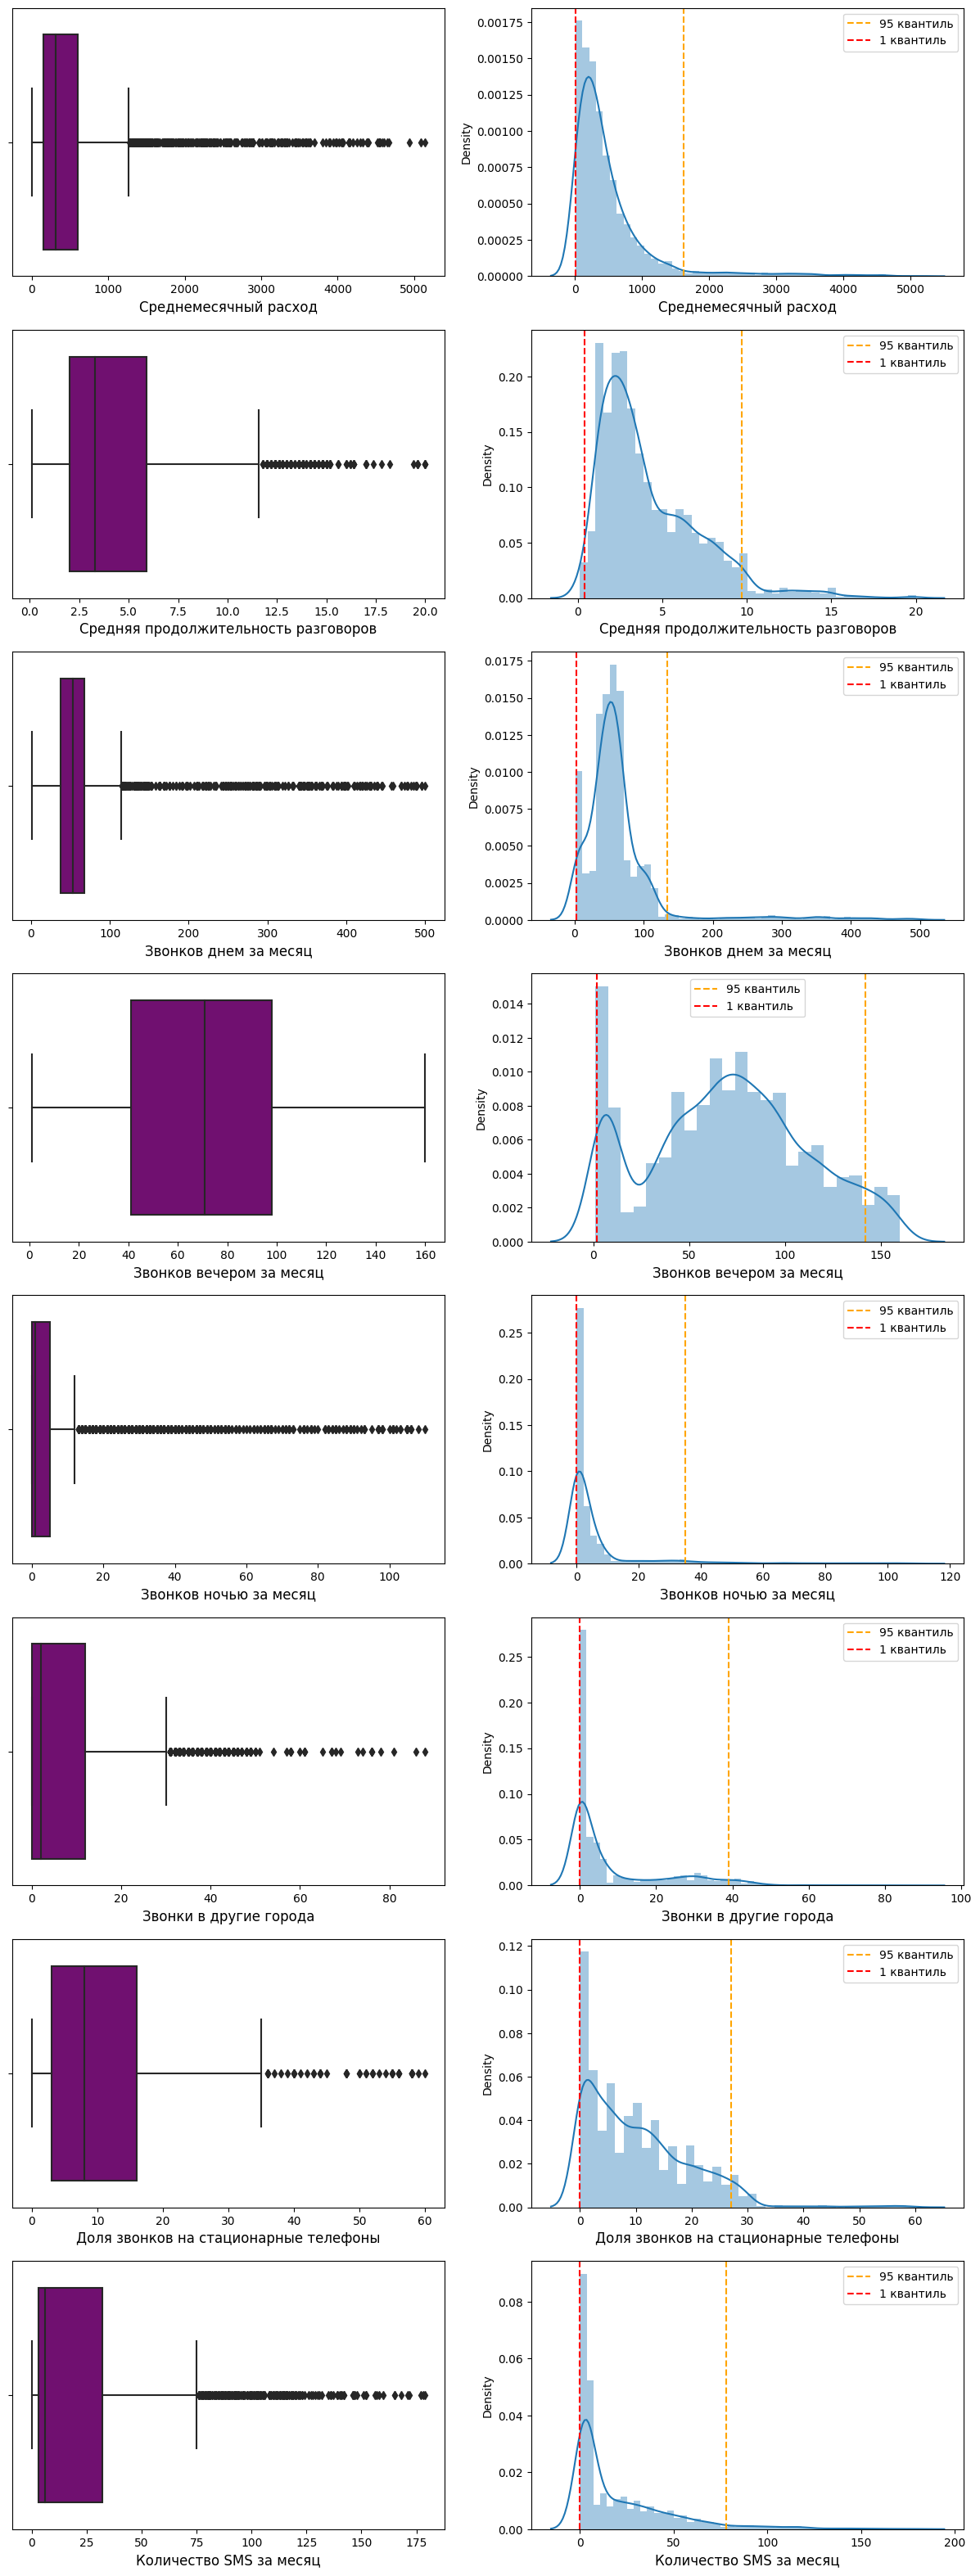

In [ ]:
fig, ax = plt.subplots(4,
                       sharex = True,
                       figsize = (15, 40)
                       )
for index, col in enumerate(dist_list):
    plt.subplot(8, 2, 2*index + 1)
    ax = sns.boxplot(data = df,
                     x = col,
                     color = 'purple')
    ax.set_xlabel(rus_dist_dict[index], fontsize = 12)

    plt.subplot(8, 2, 2*index + 2)
    ax = sns.distplot(df[col])
    ax.set_xlabel(rus_dist_dict[index], fontsize = 12)
    plt.axvline(x=df[col].quantile(0.95), color='orange', linestyle='--',label='95 квантиль')
    plt.axvline(x=df[col].quantile(0.01), color='red', linestyle='--',label='1 квантиль')
    plt.legend()

По приведенным выше графикам можно сделать вывод, что выборку по следующим признакам можно ограничить до значений:
- Среднемесячный расход - 1700
- Средняя продолжительность разговоров - 10
- Звонков днем - 140
- Звонков вечером - 145
- Звонков ночью - 35
- Звонки в другие города - 40
- Звонки на станционарные телефоны - 28
- SMS - 80

In [ ]:
df = df[(df.month_consump < 1700) & (df.duration_call < 10) & (df.month_daytime_calls < 140) & (df.month_evening_calls < 145) &\
(df.month_night_calls < 35) & (df. intercity_calls < 40) & (df.prop_ladline < 28) & (df.month_sms < 80)]

Анализ динамики по подключениям:

1. По годам

<ipython-input-33-1f46bd12908a>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2,1)


[Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Количество подключений'),
 Text(0.5, 1.0, 'Количество подключений по годам')]

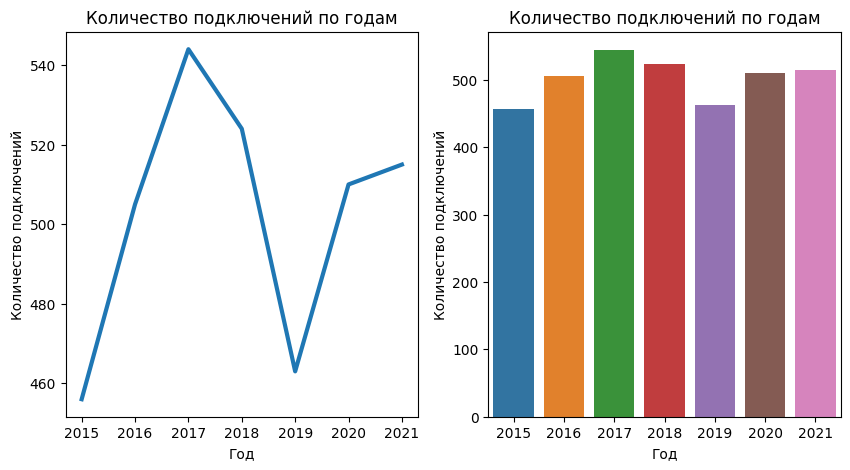

In [ ]:
year_con = df.groupby('year_connect').agg(count_connect = ('year_connect', 'count')).reset_index()
fig, ax1 = plt.subplots(4, sharex = True, figsize = (10, 5))
plt.subplot(1, 2,1)
ax1 = sns.lineplot(data=year_con, x="year_connect", y="count_connect", linewidth=3)
ax1.set (xlabel='Год',
 ylabel='Количество подключений',
 title='Количество подключений по годам')
plt.subplot(1, 2,2)
ax1 = sns.barplot(data=year_con, x="year_connect", y="count_connect")
ax1.set (xlabel='Год',
 ylabel='Количество подключений',
 title='Количество подключений по годам')

Из приведенных выше графиков следует вывод: последовательный рост резко оборвался в 2018-2019 годах, и количество подключений почти упало до значения 2015 года


2. По месяцам

<ipython-input-36-a5c1def1e4c3>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, index + 1)
<ipython-input-36-a5c1def1e4c3>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, index + 1)
<ipython-input-36-a5c1def1e4c3>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, index + 1)
<ipython-input-36-a5c1def1e4c3>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, index + 1)


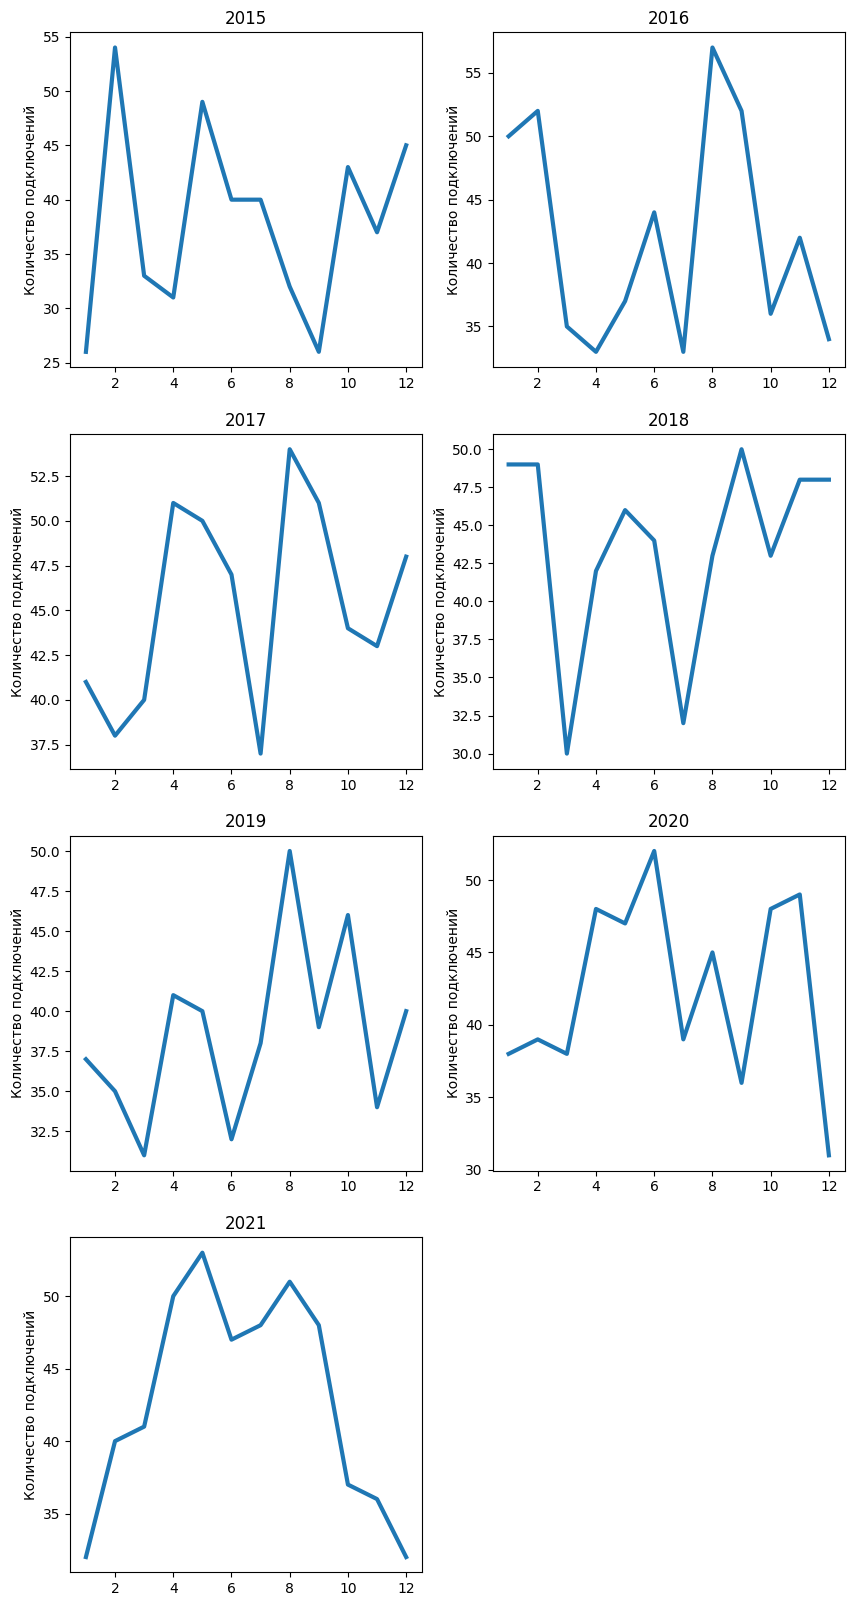

In [ ]:
month_con2= df.groupby(['year_connect','month_connect']).agg(count_connect = ('month_connect','count')).reset_index()
fig, ax6 = plt.subplots(4, sharex = True, figsize = (10, 20))
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
for index, y in enumerate(years):
    plt.subplot(4, 2, index + 1)
    ax2 = sns.lineplot(data=month_con2[month_con2.year_connect == y], x="month_connect", y="count_connect",linewidth=3)
    ax2.set (xlabel='',
    ylabel='Количество подключений',
    title = y)

3. По месяцам в среднем за ввесь период

<ipython-input-37-96316eff4a5d>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2,1)


[Text(0.5, 0, 'Месяц'), Text(0, 0.5, 'Количество подключений')]

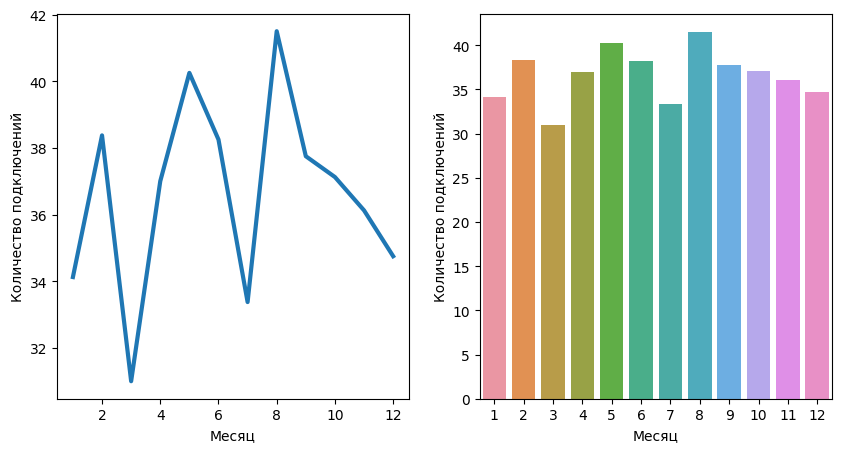

In [ ]:
month_con = df.groupby('month_connect').agg(count_connect = ('month_connect', lambda x: x.count()/8)).reset_index()
fig, ax2 = plt.subplots(4, sharex = True, figsize = (10, 5))
plt.subplot(1, 2,1)
ax2 = sns.lineplot(data=month_con, x="month_connect", y="count_connect",linewidth=3)
ax2.set (xlabel='Месяц',
 ylabel='Количество подключений')
plt.subplot(1, 2,2)
ax2 = sns.barplot(data=month_con, x="month_connect", y="count_connect")
ax2.set (xlabel='Месяц',
 ylabel='Количество подключений')

Из приведенных выше графиков следуют выводы:
- в среднем самые высокие показатели по количеству подключений в мае, августе
- в среднем самые низкие показатели по количеству подключений в январе, марте, июле, декабре

Анализ данных в разрезе категорий

In [ ]:
cat_df = df.groupby('category').agg(month_consump=('month_consump','sum'),
duration_call = ('duration_call','sum'),month_daytime_calls = ('month_daytime_calls','sum'),
month_evening_calls = ('month_evening_calls','sum'), month_night_calls = ('month_night_calls','sum'),
intercity_calls = ('intercity_calls','sum'), prop_ladline = ('prop_ladline','sum'),
month_sms = ('month_sms','sum')).reset_index()

Распределение представителей категорий в датасете (в %)

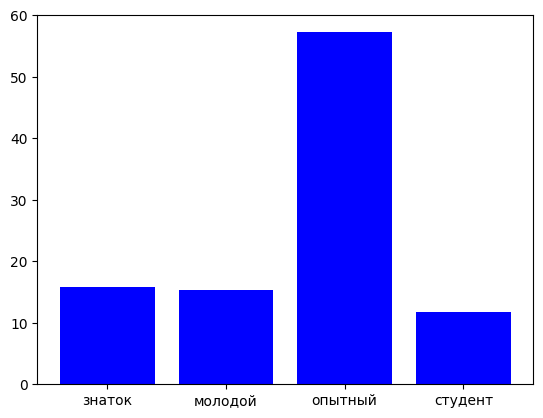

In [ ]:
cat = df.groupby('category').agg(percent = ('category', lambda x: round(x.count()/df.shape[0]*100,1))).reset_index()
plt.bar(cat['category'],cat['percent'],color = "blue")
plt.show()

In [ ]:
cat

category  percent
0   знаток     15.8
1  молодой     15.3
2  опытный     57.2
3  студент     11.8

<ipython-input-40-7d016a62c43e>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax4 = plt.subplot(4, 2, index+1)


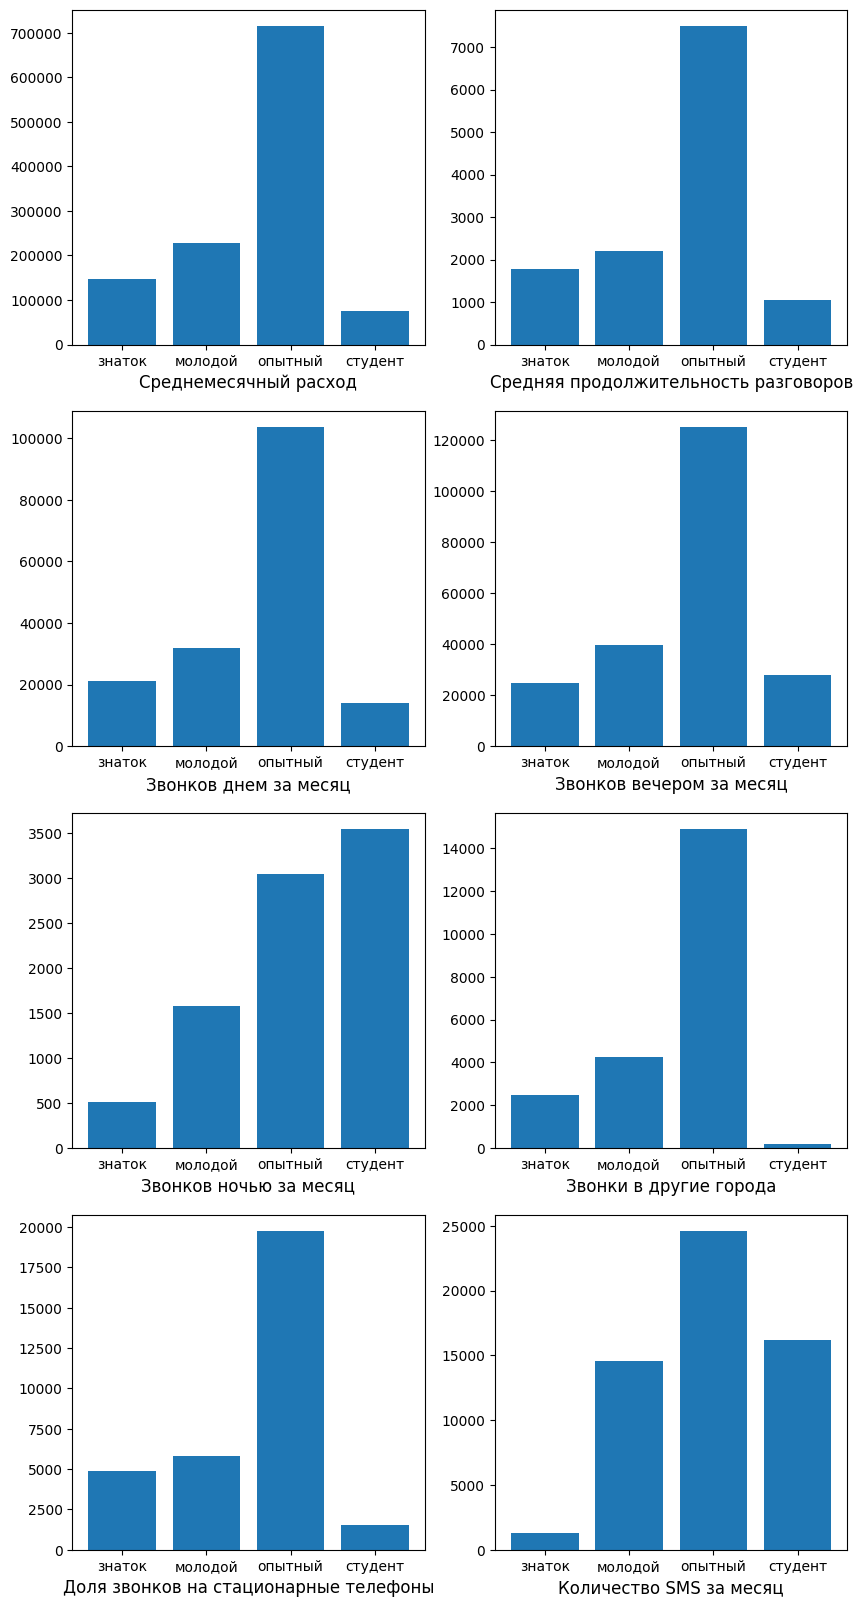

In [ ]:
fig, ax4 = plt.subplots(4,
                       sharex = True,
                       figsize = (10, 20)
                       )
for index, col in enumerate(dist_list):
    ax4 = plt.subplot(4, 2, index+1)
    plt.bar(cat_df['category'],cat_df[col])
    ax4.set_xlabel(rus_dist_dict[index], fontsize = 12)


<ipython-input-41-412c775bfe5d>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax5 = plt.subplot(4, 2, index + 1)
<ipython-input-41-412c775bfe5d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax5 = sns.distplot(df[df.category == cat][col])
<ipython-input-41-412c775bfe5d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a g

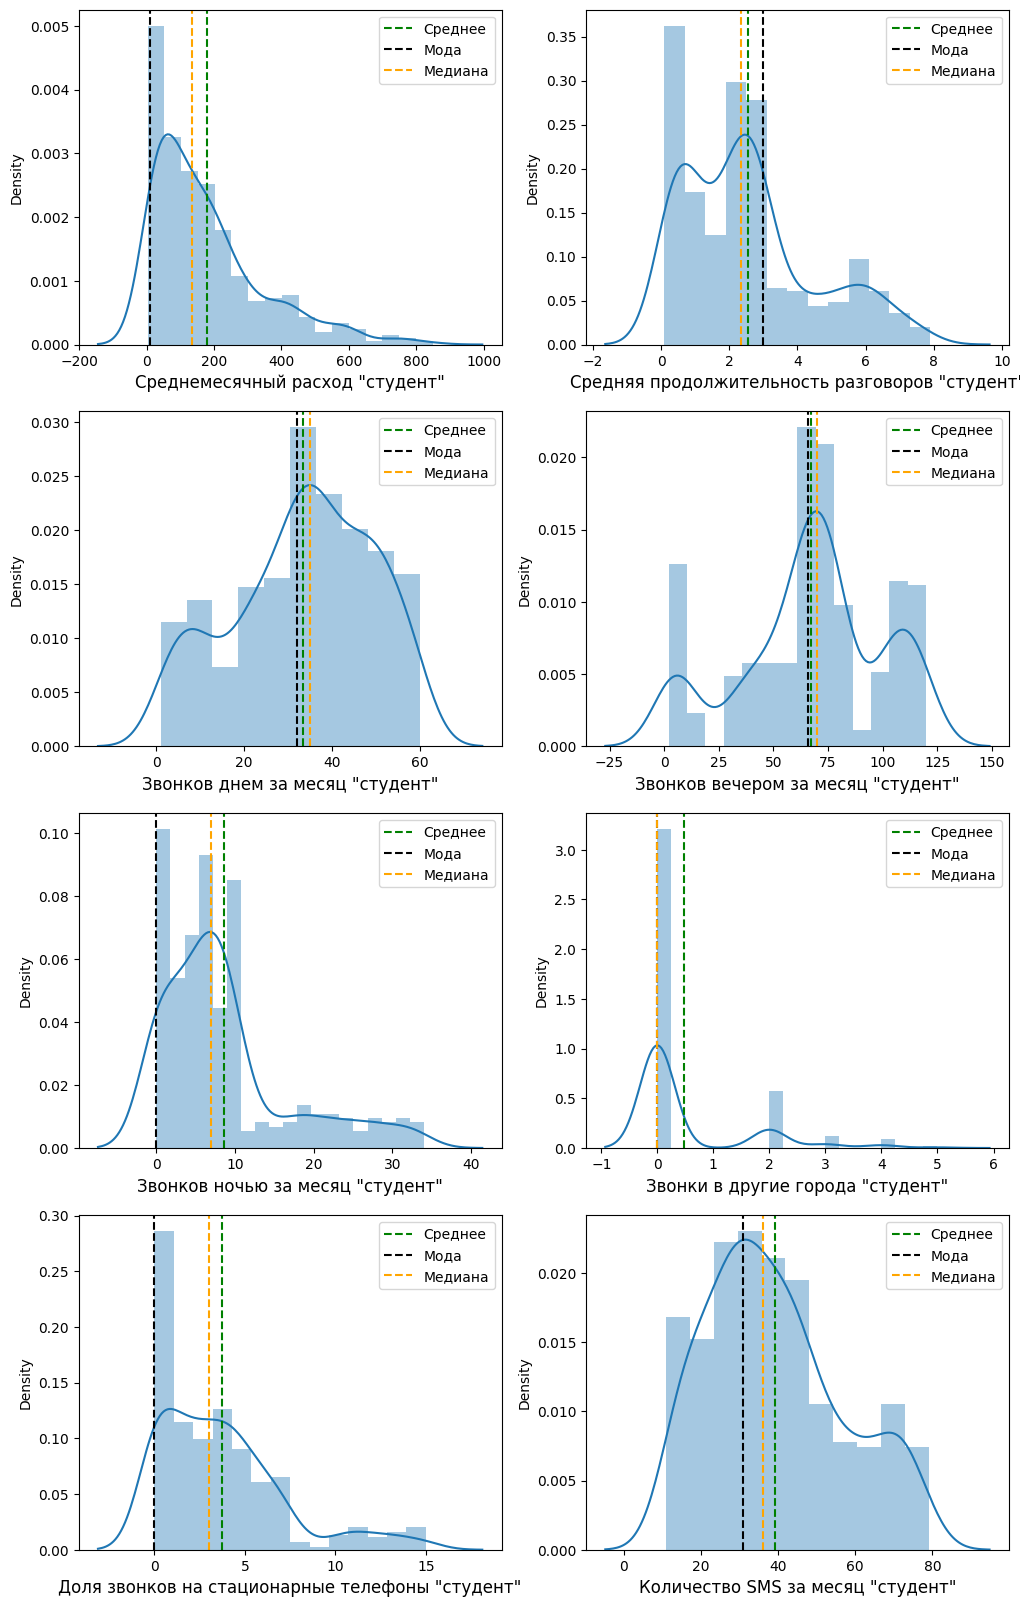

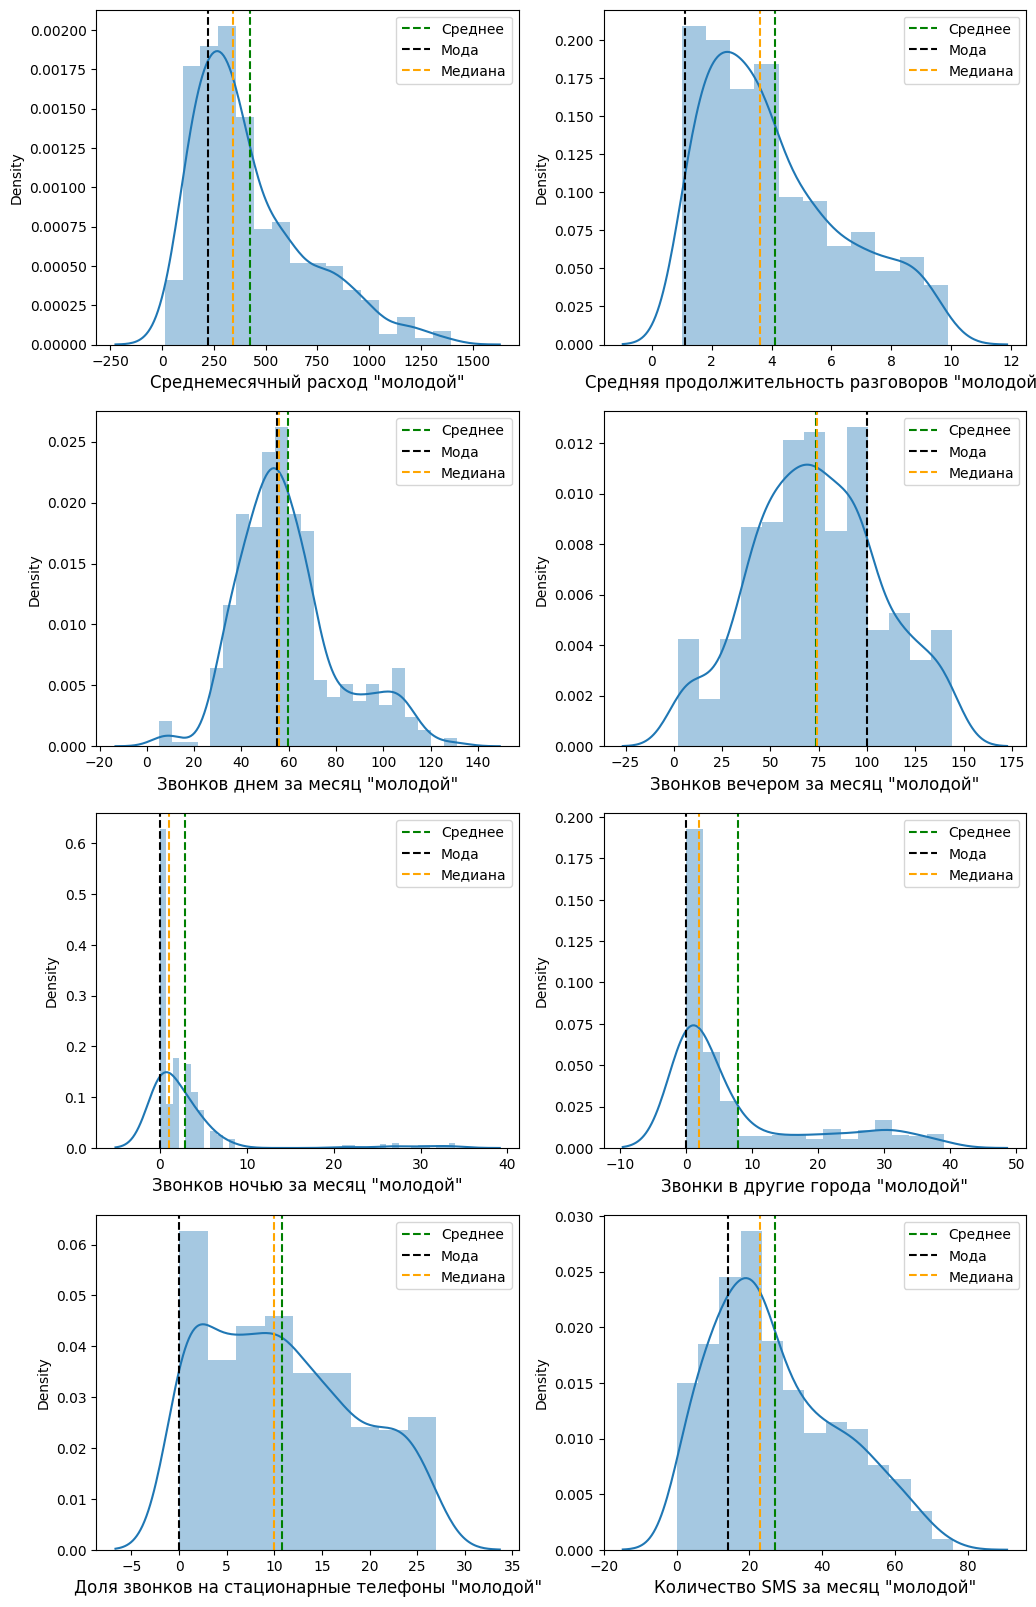

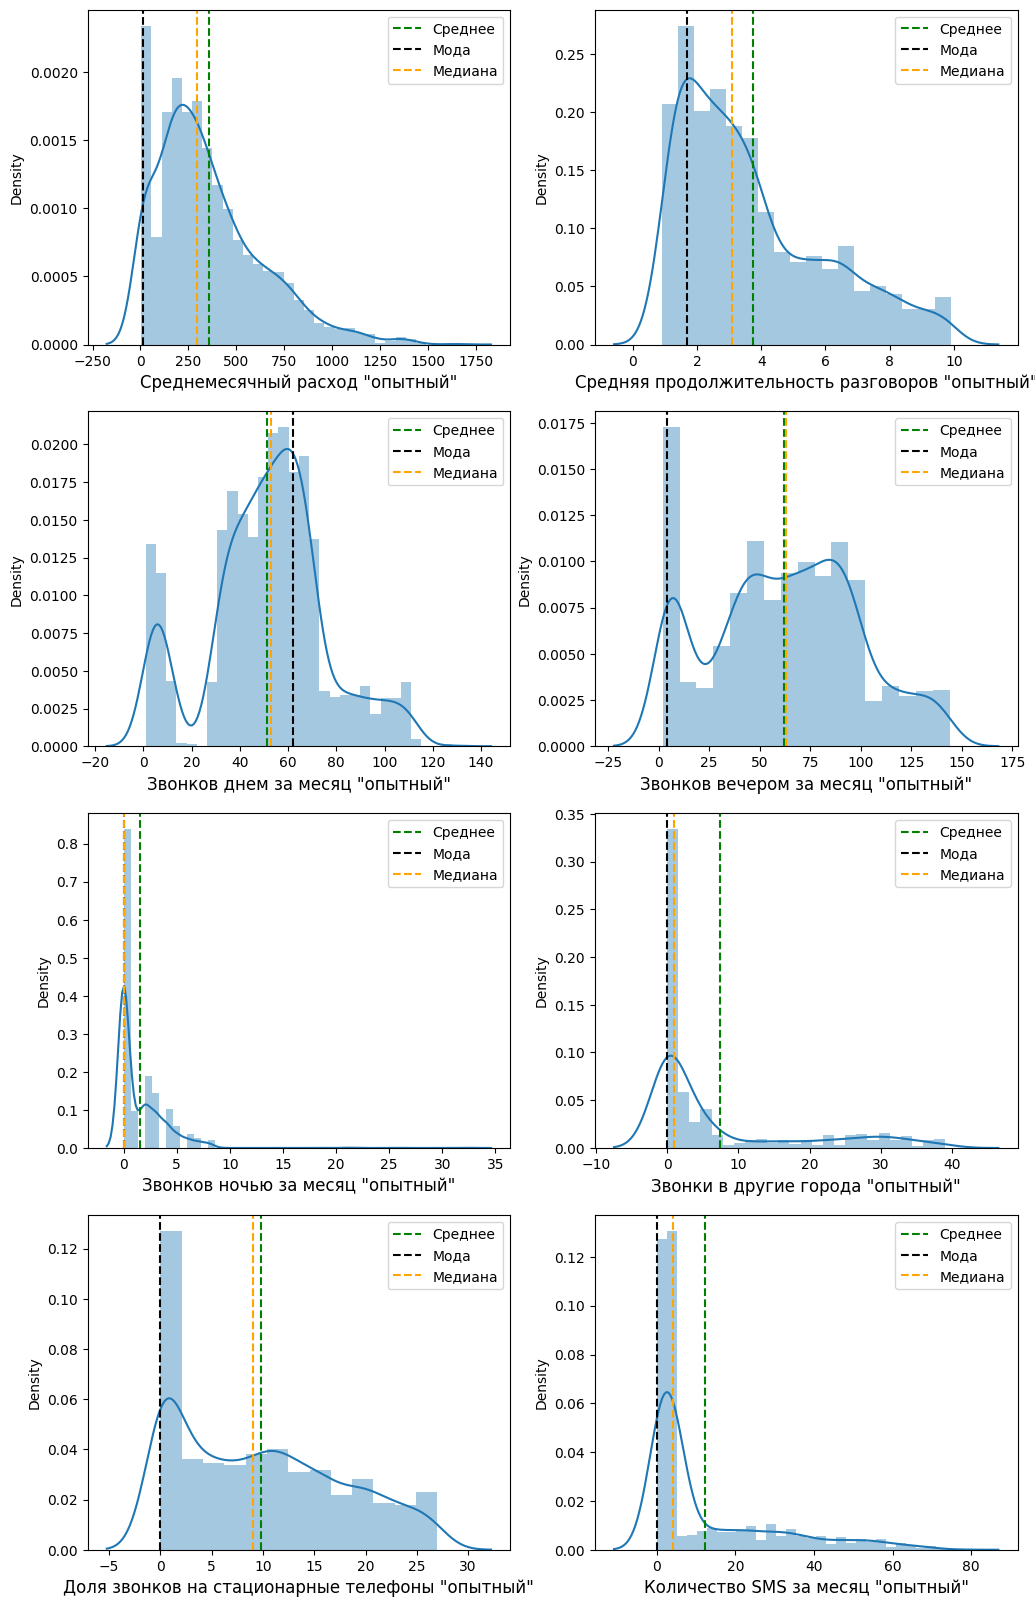

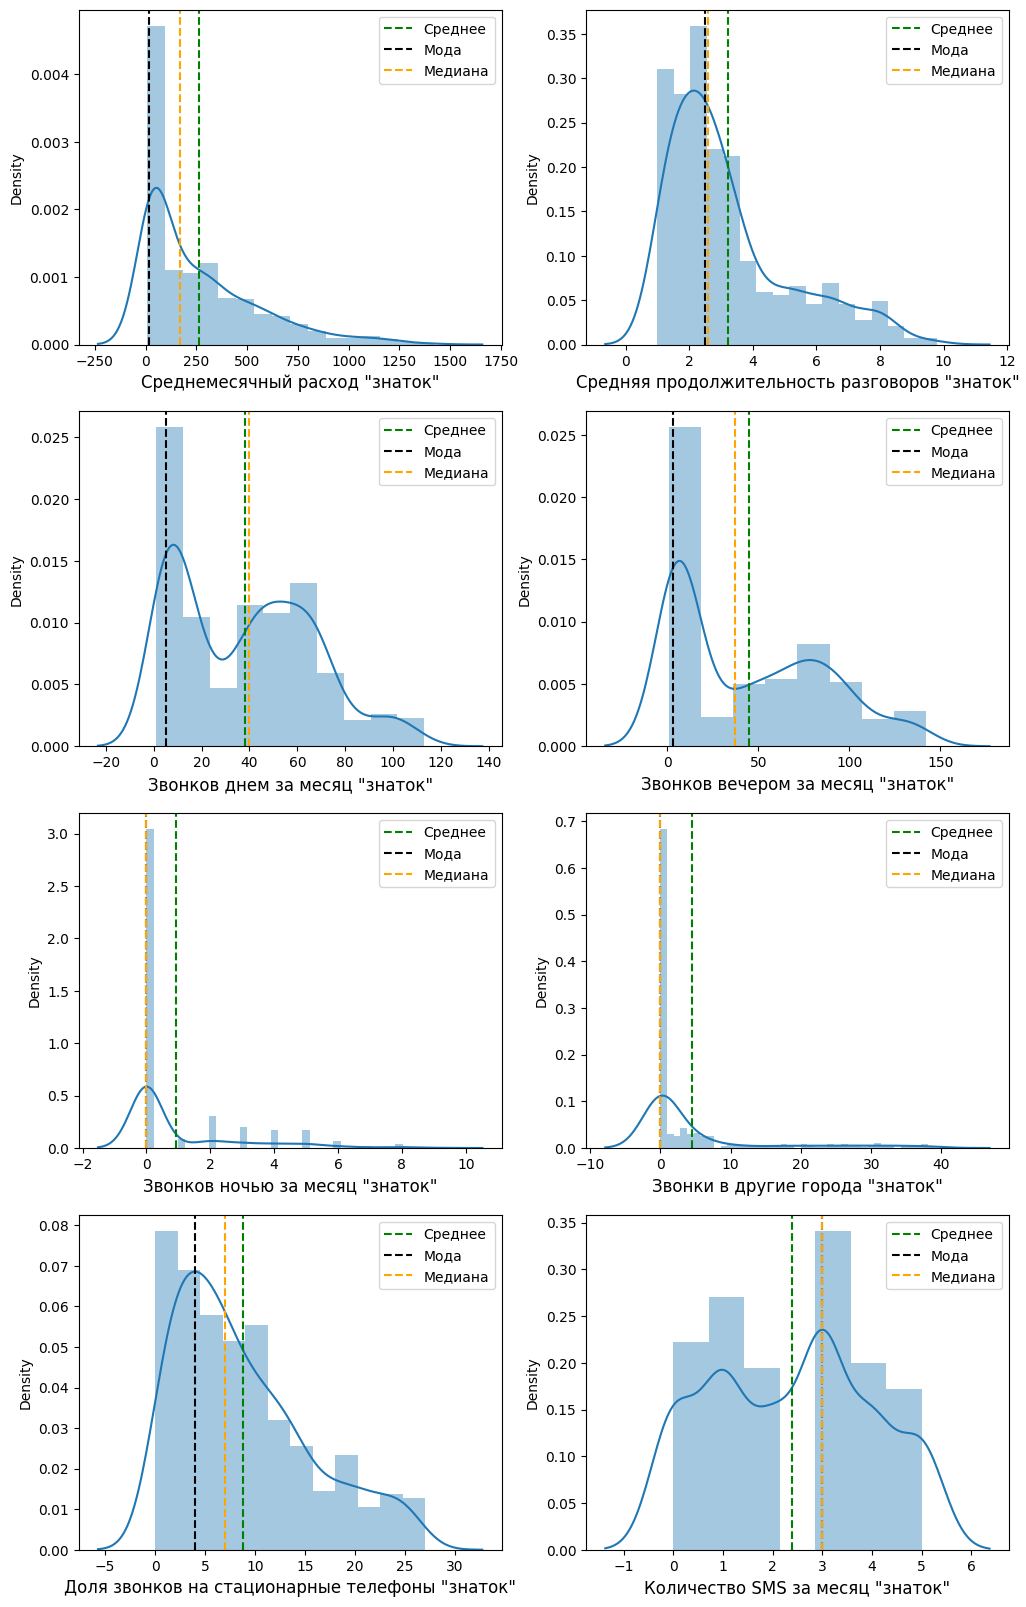

In [ ]:
for cat in ['студент','молодой','опытный','знаток']:
  fig, ax5 = plt.subplots(4, sharex = True, figsize = (12, 20)
                       )
  for index, col in enumerate(dist_list):
    ax5 = plt.subplot(4, 2, index + 1)
    ax5 = sns.distplot(df[df.category == cat][col])
    plt.axvline(x=df[df.category == cat][col].mean(), color='green', linestyle='--',label='Cреднее')
    plt.axvline(x=df[df.category == cat][col].mode()[0], color='black', linestyle='--',label='Мода')
    plt.axvline(x=df[df.category == cat][col].median(), color='orange', linestyle='--',label='Медиана')
    ax5.set_xlabel(rus_dist_dict[index]+' "'+cat+'"', fontsize = 12)
    plt.legend()

Из приведенных выше графиков, относительно  количественного распределения категорий, можно сделать следующие выводы:
- По показателю "среднемесячный расход" "студенты" являются наименее прибыльной категорией (вероятно, в виду наименьшей платежеспособности).
- По показателю "количество звоноков за месяц":
 - Вечером - по категрии "студенты" можно явно наблюдать 3 подкатегории: 0 - 20; 60 - 85; 105 - 120.
 - Днем - по категориям "опытный" и "знаток" можно наблюдать 2 категории: 0 - 15; 30 - 70 и 0 - 20 и 40 - 70 соответственно.

 Также видно, что распределение по количеству звонков за месяц днем и вечером примерно прямо пропорционально распределению среднемесячного расхода.
 - Ночью - видно явное превосходство относитльно доли по количественному распределению "студентов", также заметен рост доли по категории "молодые".
- По показателю "Звонки в другие города" наблюдается заметный провал по "студентам", в остальном, закономерное распределение.
- Можно сделать вывод, что "Количество SMS за месяц" обратно пропорционально возрасту клиента. Целевой категорией являются "студенты-молодые".


Выявление ТОП-2 категорий по показателям:

1. Среднемесячный расход

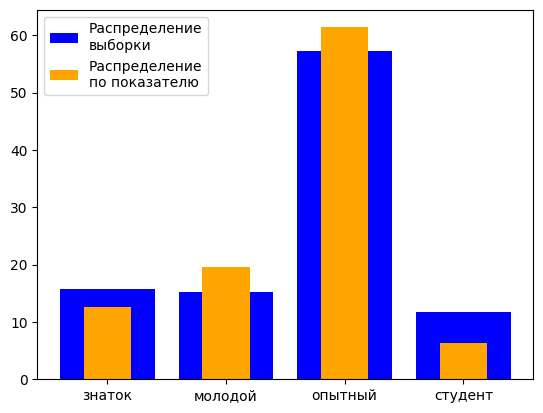

In [ ]:
consump_percent = df.groupby('category').agg(percent = ('month_consump', lambda x: round(x.sum()/df.month_consump.sum()*100,1))).reset_index()
plt.bar(cat['category'],cat['percent'],color = "blue", width = 0.8,label = "Распределение\nвыборки")
plt.bar(consump_percent['category'],consump_percent['percent'],color = "orange", width = 0.4, label = "Распределение\nпо показателю")
plt.legend(loc = "upper left")
plt.show()

Выводы:

Как по абсолютным, так и по относительным значениям ТОП-2: "опытный" и "молодой".

2. Количество звонков в месяц

<ipython-input-50-e755160669f9>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


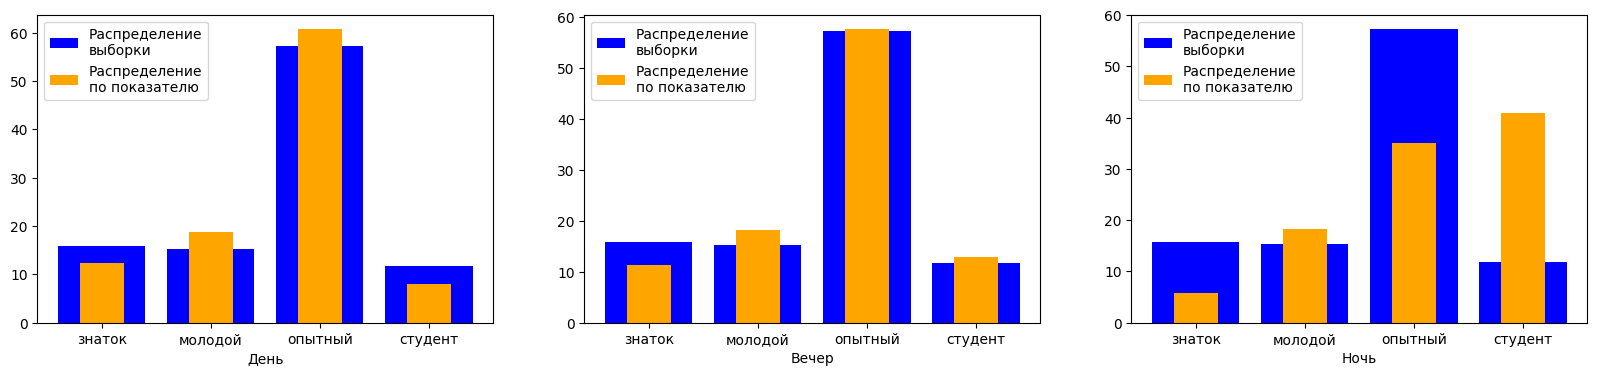

In [ ]:
day_percent = df.groupby('category').agg({'month_daytime_calls': lambda x: round(x.sum()/df.month_daytime_calls.sum()*100,1),\
                                          'month_evening_calls': lambda x: round(x.sum()/df.month_evening_calls.sum()*100,1),\
                                          'month_night_calls': lambda x: round(x.sum()/df.month_night_calls.sum()*100,1)}).reset_index()

fig = plt.subplots(4, sharex = True, figsize = (20, 4))
plt.subplot(1, 3, 1)
plt.bar(cat['category'],cat['percent'],color = "blue", width = 0.8,label = "Распределение\nвыборки")
plt.bar(day_percent['category'],day_percent['month_daytime_calls'],color = "orange", width = 0.4,label = "Распределение\nпо показателю")
plt.legend(loc = "upper left")
plt.xlabel("День")

plt.subplot(1, 3, 2)
plt.bar(cat['category'],cat['percent'],color = "blue", width = 0.8,label = "Распределение\nвыборки")
plt.bar(day_percent['category'],day_percent['month_evening_calls'],color = "orange", width = 0.4,label = "Распределение\nпо показателю")
plt.legend(loc = "upper left")
plt.xlabel("Вечер")

plt.subplot(1, 3, 3)
plt.bar(cat['category'],cat['percent'],color = "blue", width = 0.8,label = "Распределение\nвыборки")
plt.bar(day_percent['category'],day_percent['month_night_calls'],color = "orange", width = 0.4,label = "Распределение\nпо показателю")
plt.legend(loc = "upper left")
plt.xlabel("Ночь")
plt.show()

Выводы:
- День:

Как по абсолютным, так и по относительным значениям ТОП-2: "опытный" и "молодой".

- Вечер:

По абсолютным значениям ТОП-2: "опытный" и "молодой".

По относительным значениям ТОП-2: "молодой" и "студент".

- Ночь:

По абсолютным значениям ТОП-2: "студент" и "опытный".

По относительным значениям ТОП-2: "студент" и "молодой".

Выявление зависимости между признаками

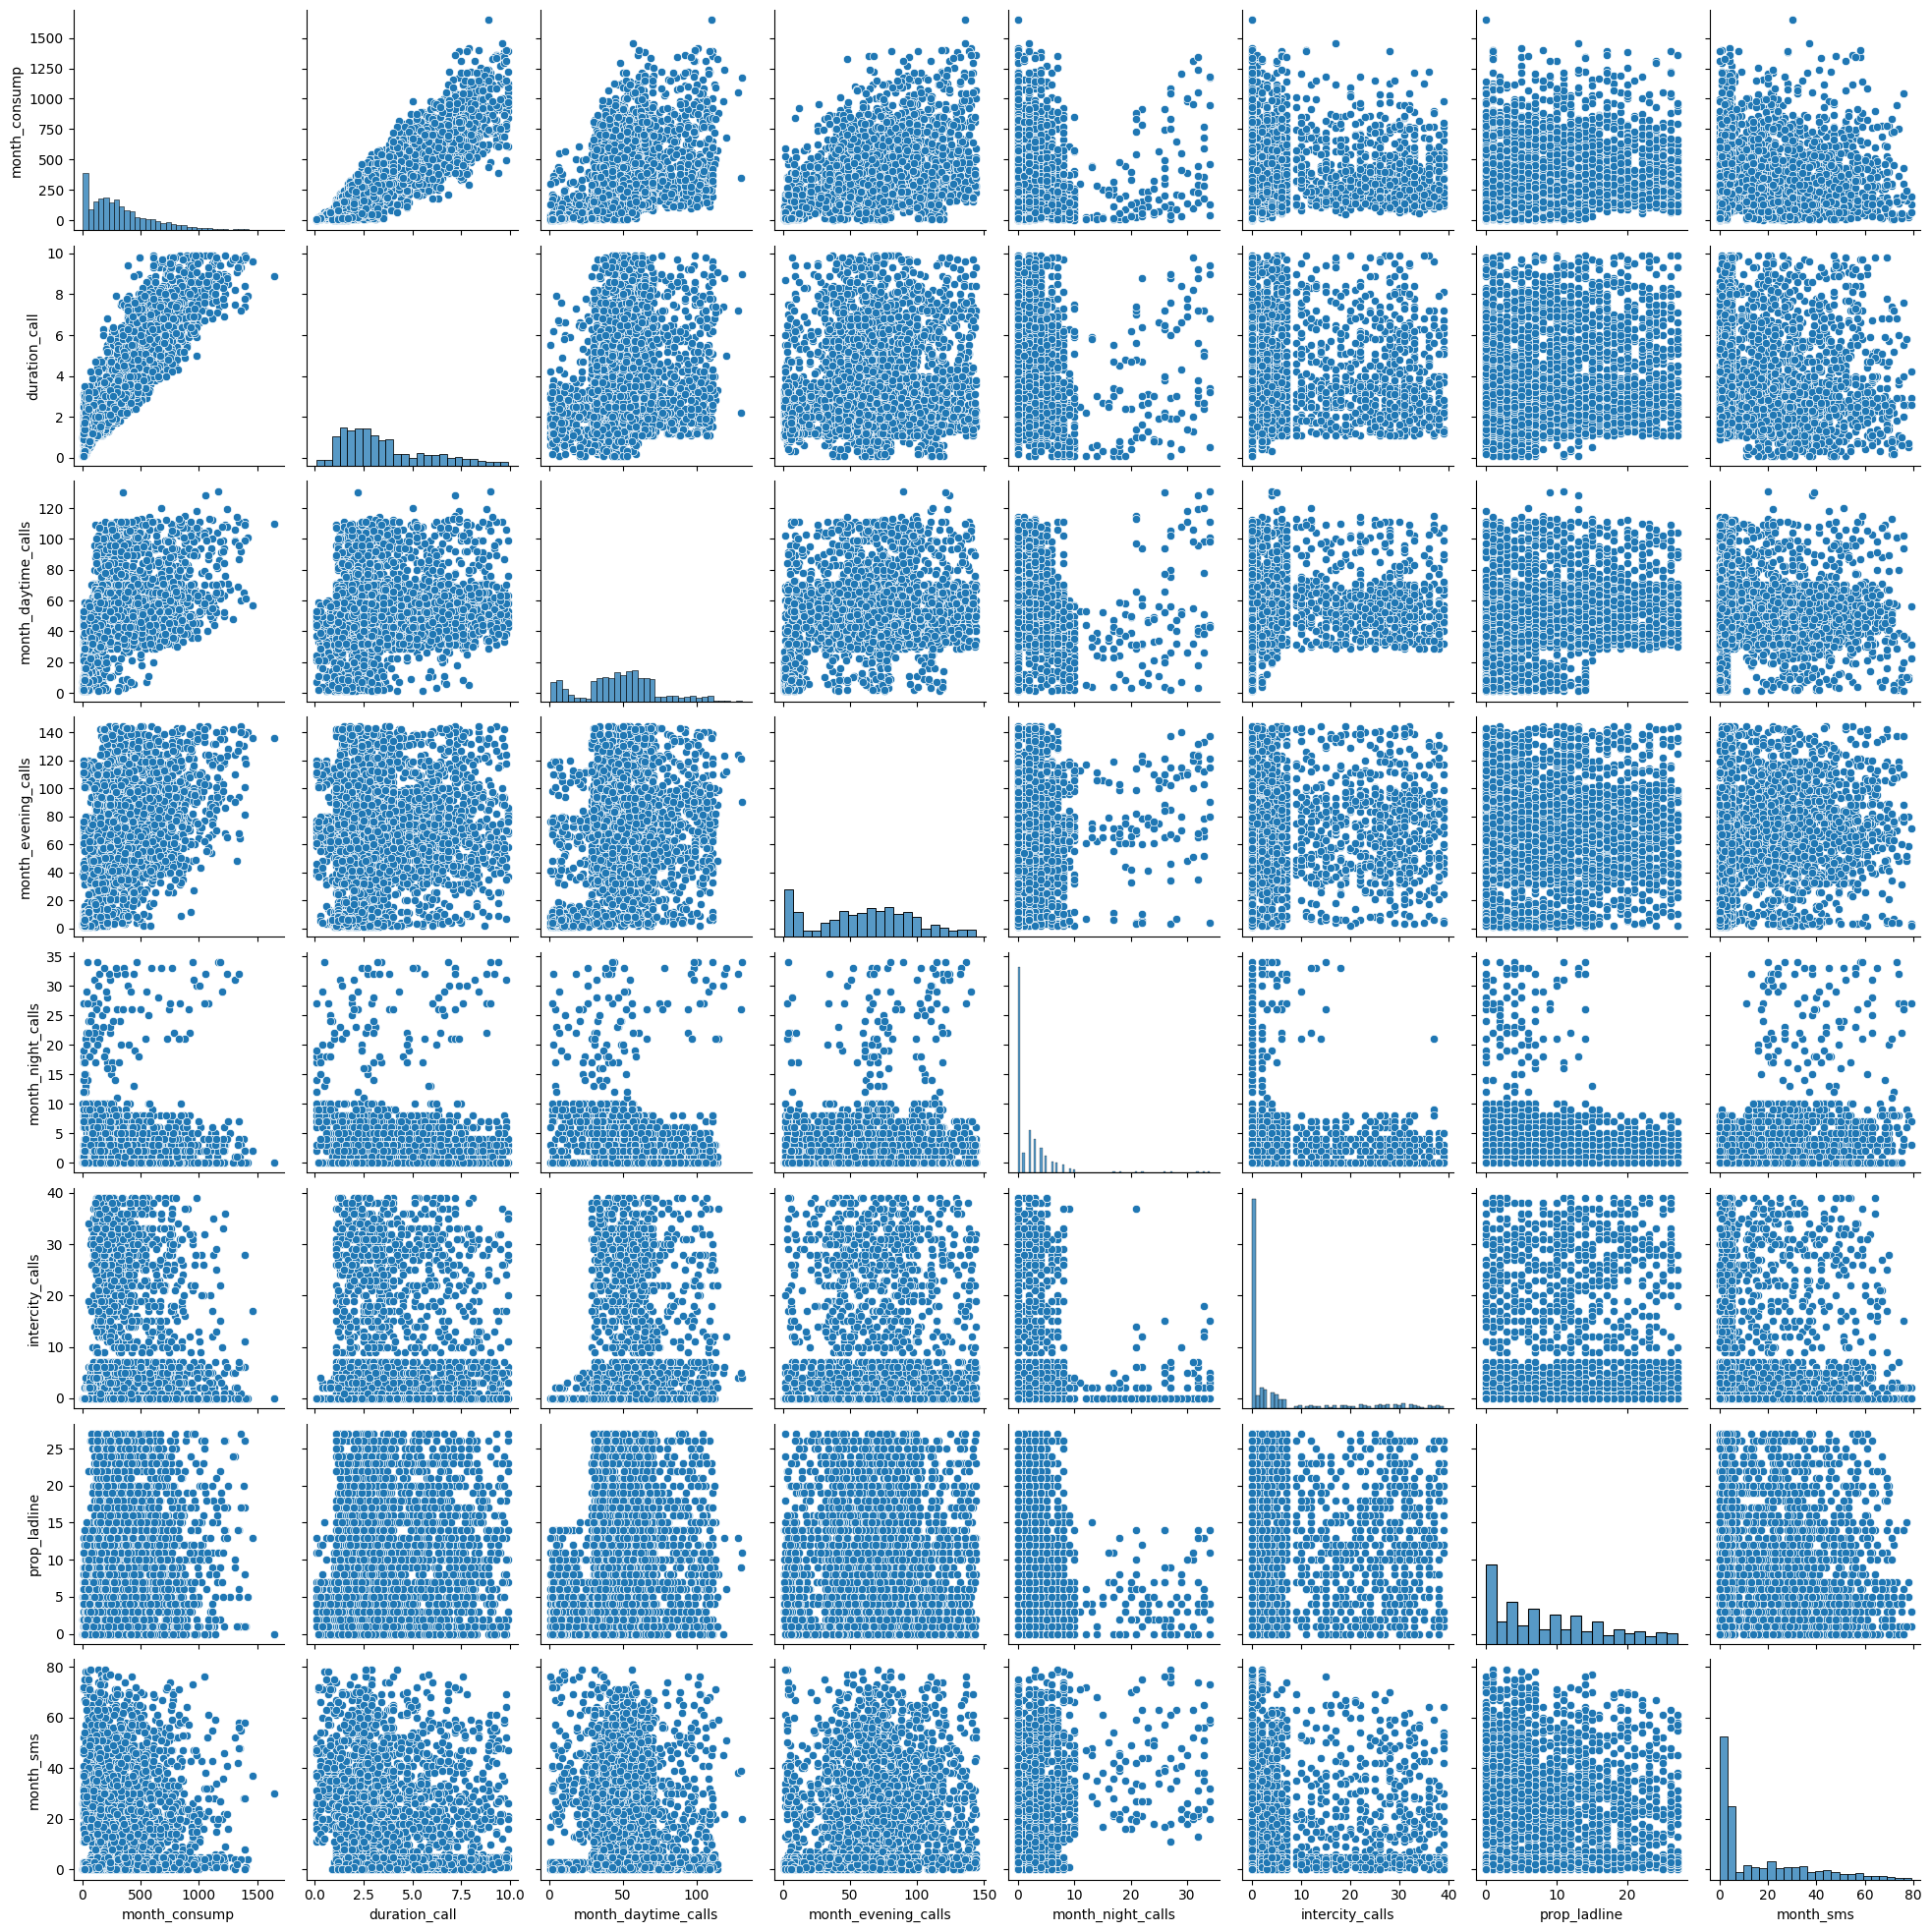

In [ ]:
sns.pairplot(df[dist_list])

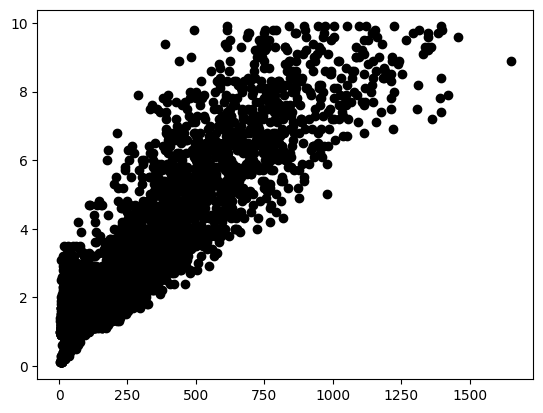

In [ ]:
plt.scatter(df.month_consump, df.duration_call, color="black")

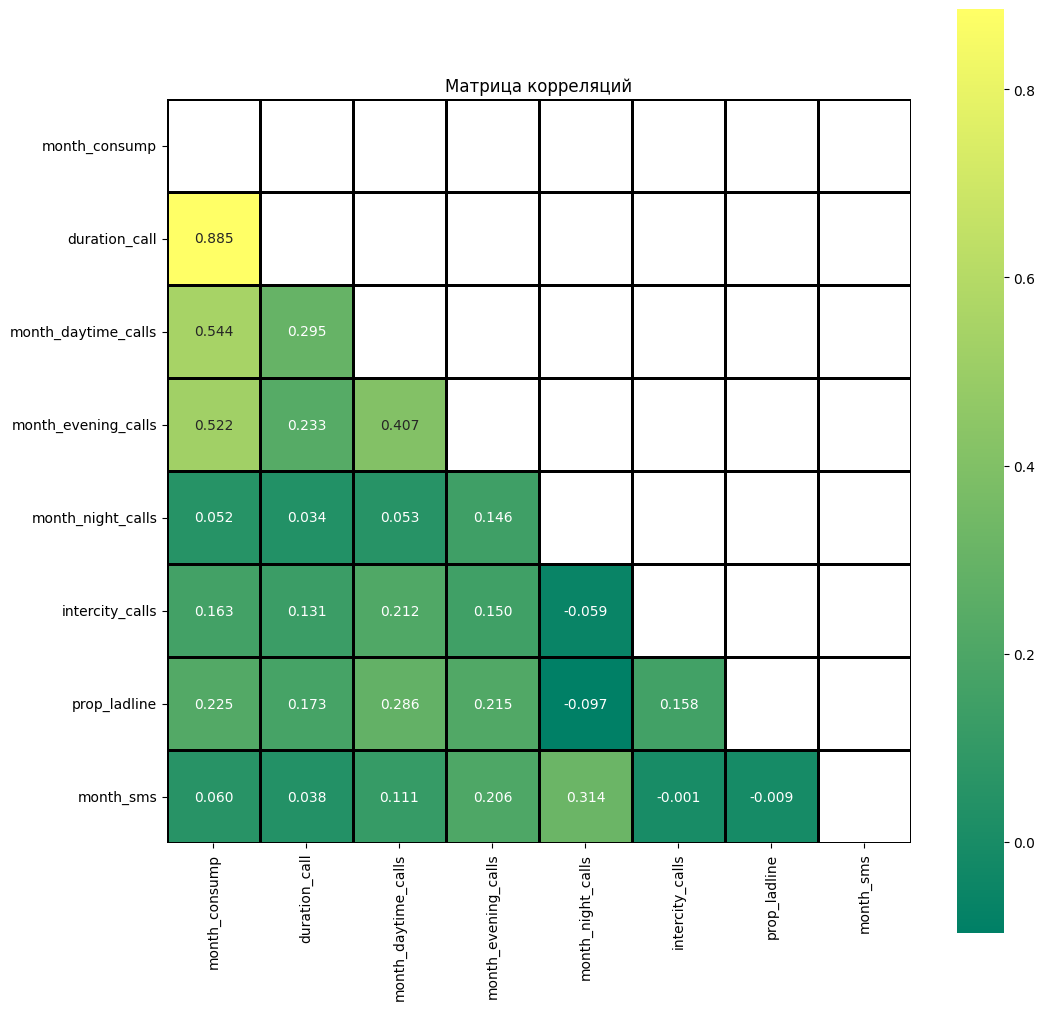

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df[dist_list].corr(), annot=True, square=True,
                 cmap='summer', fmt='.3f', linewidths=1,
                 linecolor='black', mask=np.triu(df[dist_list].corr()))
plt.title('Матрица корреляций')
plt.show()

In [ ]:
print(f'''Коэффициент корреляции Пирсона по показателям:
"Средняя продолжительность звонка" {pearsonr(df.month_consump, df.duration_call)}
"Звонков днем за месяц", {pearsonr(df.month_consump, df.month_daytime_calls)}
"Звонков вечером за месяц", {pearsonr(df.month_consump, df.month_evening_calls)}
"Доля звонков на стационарные телефоны", {pearsonr(df.month_consump, df.prop_ladline)}''')

Коэффициент корреляции Пирсона по показателям:
"Средняя продолжительность звонка" PearsonRResult(statistic=0.885253360600334, pvalue=0.0)
"Звонков днем за месяц", PearsonRResult(statistic=0.5444456958561876, pvalue=1.1090216506914712e-270)
"Звонков вечером за месяц", PearsonRResult(statistic=0.5215881507245688, pvalue=1.122951617603395e-244)
"Доля звонков на стационарные телефоны", PearsonRResult(statistic=0.22514822708945226, pvalue=1.1680653680063784e-41)


После проведения корреляционного анализа можно сделать уверенный вывод о том, что такой показатель, как "Средняя продолжительность звонка" в высокой степепни вляиет на среднемесячный расход клиента (тесная связь между показателями, судя по коэффициенту корреляции $0.75 \le 0.86 <0.95$).

Также присутствует умеренная связь ключегого показателя с такими как "Звонков днем за месяц" и "Звонков вчером за месяц" ($0.5 \le 0.54 <0.75$ и $0.5 \le 0.52 <0.75$ соответсвенно).

"Доля звонков на стационарные телефоны" менее существенно влияет на расход (слабая связь $0.2 \le 0.23 <0.5$).

О статистической значимости всех четырёх показателей можно судить по $p_{value}$, который во всех случаях равен нулю. Соответственно, при $\alpha$ = 0.05, нет оснований отвергать гипотезу о значимости связей между показателями.

Используя полученные данные из анализа в разрезе сегментов и корреляционного анализа стоит рассмотреть показатель «средняя продолжительность звонков» детальней.
Самая частая продолжительность разговора по категориям:
-	"студент" 2-3 мин;
-	"молодой" стремится к 4 мин;
-	"опытный" диапазон шире - 2-4 мин;
-	"знаток" 2.30-3.30.

Следовательно, предлагается выделить как потенциально перспективную категорию «молодые», т.к. самая популярная продолжительность разговора стремится к 4 минутам и доля представителей этой категории – вторая по величине.

Но целевая категория, безусловно - «опытные» т.к. имеет подавляющую долю распределения среди всех категорий.  Кроме этого, самая популярная продолжительность разговора так же стремится к 4 минутам, но диапазон шире, в виду большого абсолютного числа клиентов.
